Main Quest 02
가랏 몬스터볼! 전설의 포켓몬 찾아 삼만리

개요
학습 전제:
numpy, pandas를 활용해서 표 데이터를 다뤄본 적이 있고, 이에 대한 기본적인 활용을 할 수 있습니다.
pandas의 문법과 다양한 메서드를 활용해 본 적이 있고, 코드를 보면 어느 정도 이해할 수 있습니다.
matplotlib을 활용해서 데이터 시각화를 해본 적이 있고, 코드를 보면 어느 정도 이해할 수 있습니다.
데이터셋을 train/test 데이터셋으로 나누어서 모델을 학습 및 검증해본 경험이 있습니다.

학습 목표:
다양한 피처가 있는 데이터셋을 밑바닥부터 샅샅이 뜯어보고, 전설의 포켓몬을 분류하기 위한 피처에는 무엇이 있는지 생각해 봅시다.
모델 학습을 시작하기 전 모든 컬럼에 대해 그래프 시각화, 피벗 테이블 등을 활용하며 다양한 방법으로 충분한 EDA를 진행합니다.
모델 학습에 넣기 위해서 전처리가 필요한 범주형/문자열 데이터에 대한 전처리를 원-핫 인코딩 등으로 적절하게 진행합니다.
전체 데이터셋을 train/test 데이터셋으로 나누고, 적절한 분류 모델(Decision Tree)을 선택해 학습시키며 베이스라인과 비교합니다.

목차
포켓몬, 그 데이터는 어디서 구할까

(1) 안녕, 포켓몬과 인사해!

(2) 포켓몬, 그 데이터는 어디서 구할까

(3) 포켓몬 데이터 불러오기

전설의 포켓몬? 먼저 샅샅이 살펴보자!

(1) 결측치와 전체 칼럼

(2) ID와 이름

(3) 포켓몬의 속성

(4) 모든 스탯의 총합

(5) 세부 스탯

(6) 세대

전설의 포켓몬과 일반 포켓몬, 그 차이는?

(1) 전설의 포켓몬의 Total값

(2) 전설의 포켓몬의 이름

모델에 넣기 위해! 데이터 전처리하기

(1) 이름의 길이가 10 이상인가?

(2) 이름에 자주 쓰이는 토큰 추출

(3) Type 1 & 2! 범주형 데이터 전처리하기

가랏, 몬스터볼!

(1) 가장 기본 데이터로 만드는 베이스라인

(2) 의사 결정 트리 모델 학습시키기

(3) 피처 엔지니어링 데이터로 학습시키면 얼마나 차이가 날까?

(4) 의사 결정 트리 모델 다시 학습시키기가랏 몬스터볼! 전설의 포켓몬 찾아 삼만리


In [ ]:
# 순서: EDA > DATA PREPROCESS > MODELING > SUBMIT > Tuning (Feature Engineering, Hyper Parameter Tuning)> 모델 점수에 도달하였는가?> Yes시 종료 및 유지 관리
# 메인 퀘스트 시작

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


In [ ]:
import os
csv_path = os.getenv("HOME") +"/aiffel/pokemon_eda/data/Pokemon.csv"
original_data = pd.read_csv(csv_path)
print('슝=3')

슝=3


In [ ]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [ ]:
# Q. 일반 포켓몬의 데이터셋도 만들어봅시다.
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [ ]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [ ]:
len(set(pokemon["#"]))

721

In [ ]:
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [ ]:
# Q. 총 몇 종류의 포켓몬 이름이 있는지 확인해봅시다!
unique_pokemon_count = pokemon['Name'].nunique()
print(f"There are {unique_pokemon_count} unique Pokémon names in the dataset.")

There are 800 unique Pokémon names in the dataset.


In [ ]:
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [ ]:
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

In [ ]:
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

In [ ]:
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Dragon', 'Poison', 'Fighting', 'Steel', 'Grass', 'Ghost', 'Ice', 'Fire', 'Bug', 'Normal', 'Psychic', 'Fairy', 'Water', 'Flying', 'Rock', 'Electric', 'Dark', 'Ground']


In [ ]:
pokemon["Type 2"].isna().sum()

386

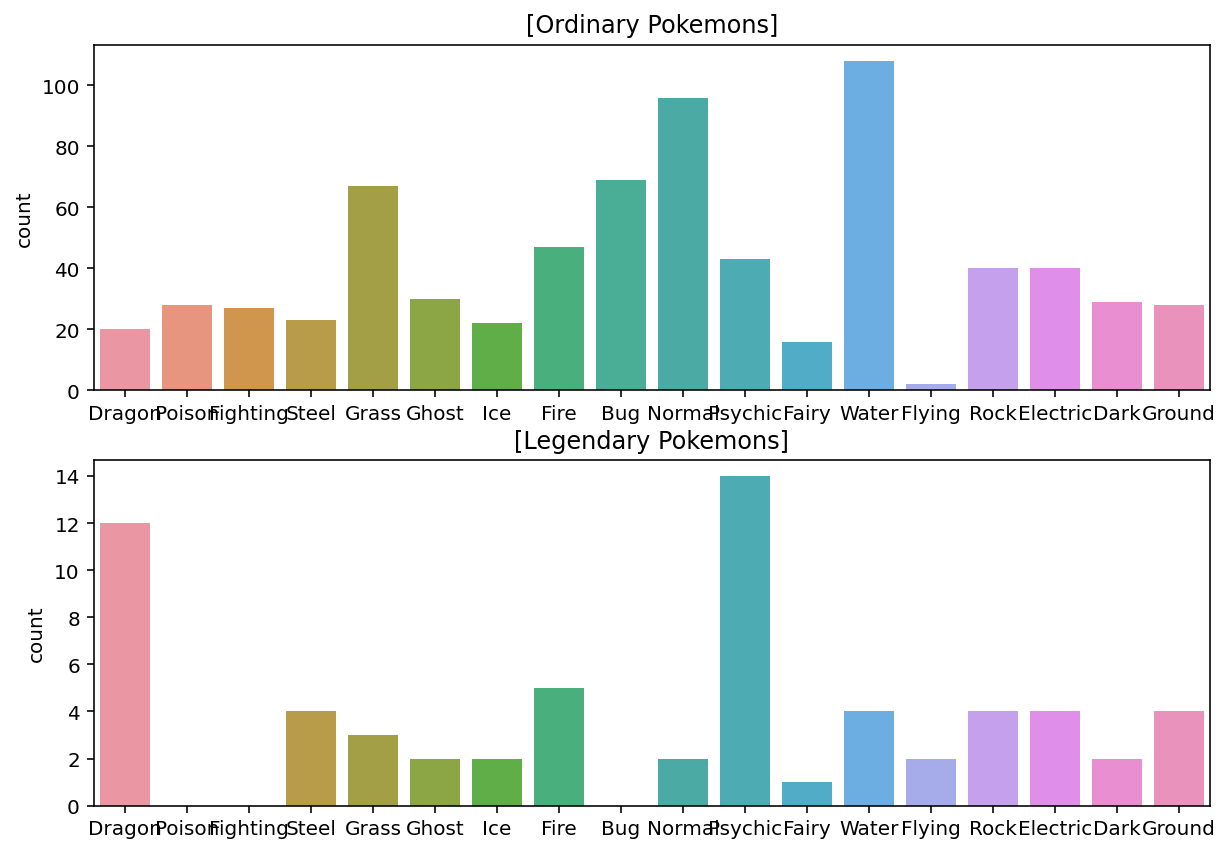

In [ ]:
plt.figure(figsize=(10, 7))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [ ]:
#레전드 몬이 psychic, Draon 등의 수치가 높음
#포켓몬 Id number. 성별이 다르지만 같은 포켓몬인 경우 등은 같은 #값을 가진다.
int
#Name : 포켓몬 이름. 포켓몬 각각의 이름으로 저장되고, 800개의 포켓몬의 이름 데이터는 모두 다르다. (unique) str
#Type 1 : 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. str
#Type 2 : 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다. str
#Total : 전체 6가지 스탯의 총합. int
#HP : 포켓몬의 체력. int
#Attack : 물리 공격력. (scratch, punch 등) int
#Defense : 물리 공격에 대한 방어력. int
#Sp. Atk : 특수 공격력. (fire blast, bubble beam 등) int
#Sp. Def : 특수 공격에 대한 방어력. int
#Speed : 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은 포켓몬이 먼저 공격한다) int
#Generation : 포켓몬의 세대. 현재 데이터에는 6세대까지 있다. int
#Legendary : 전설의 포켓몬 여부. !! Target feature !! bool

In [ ]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


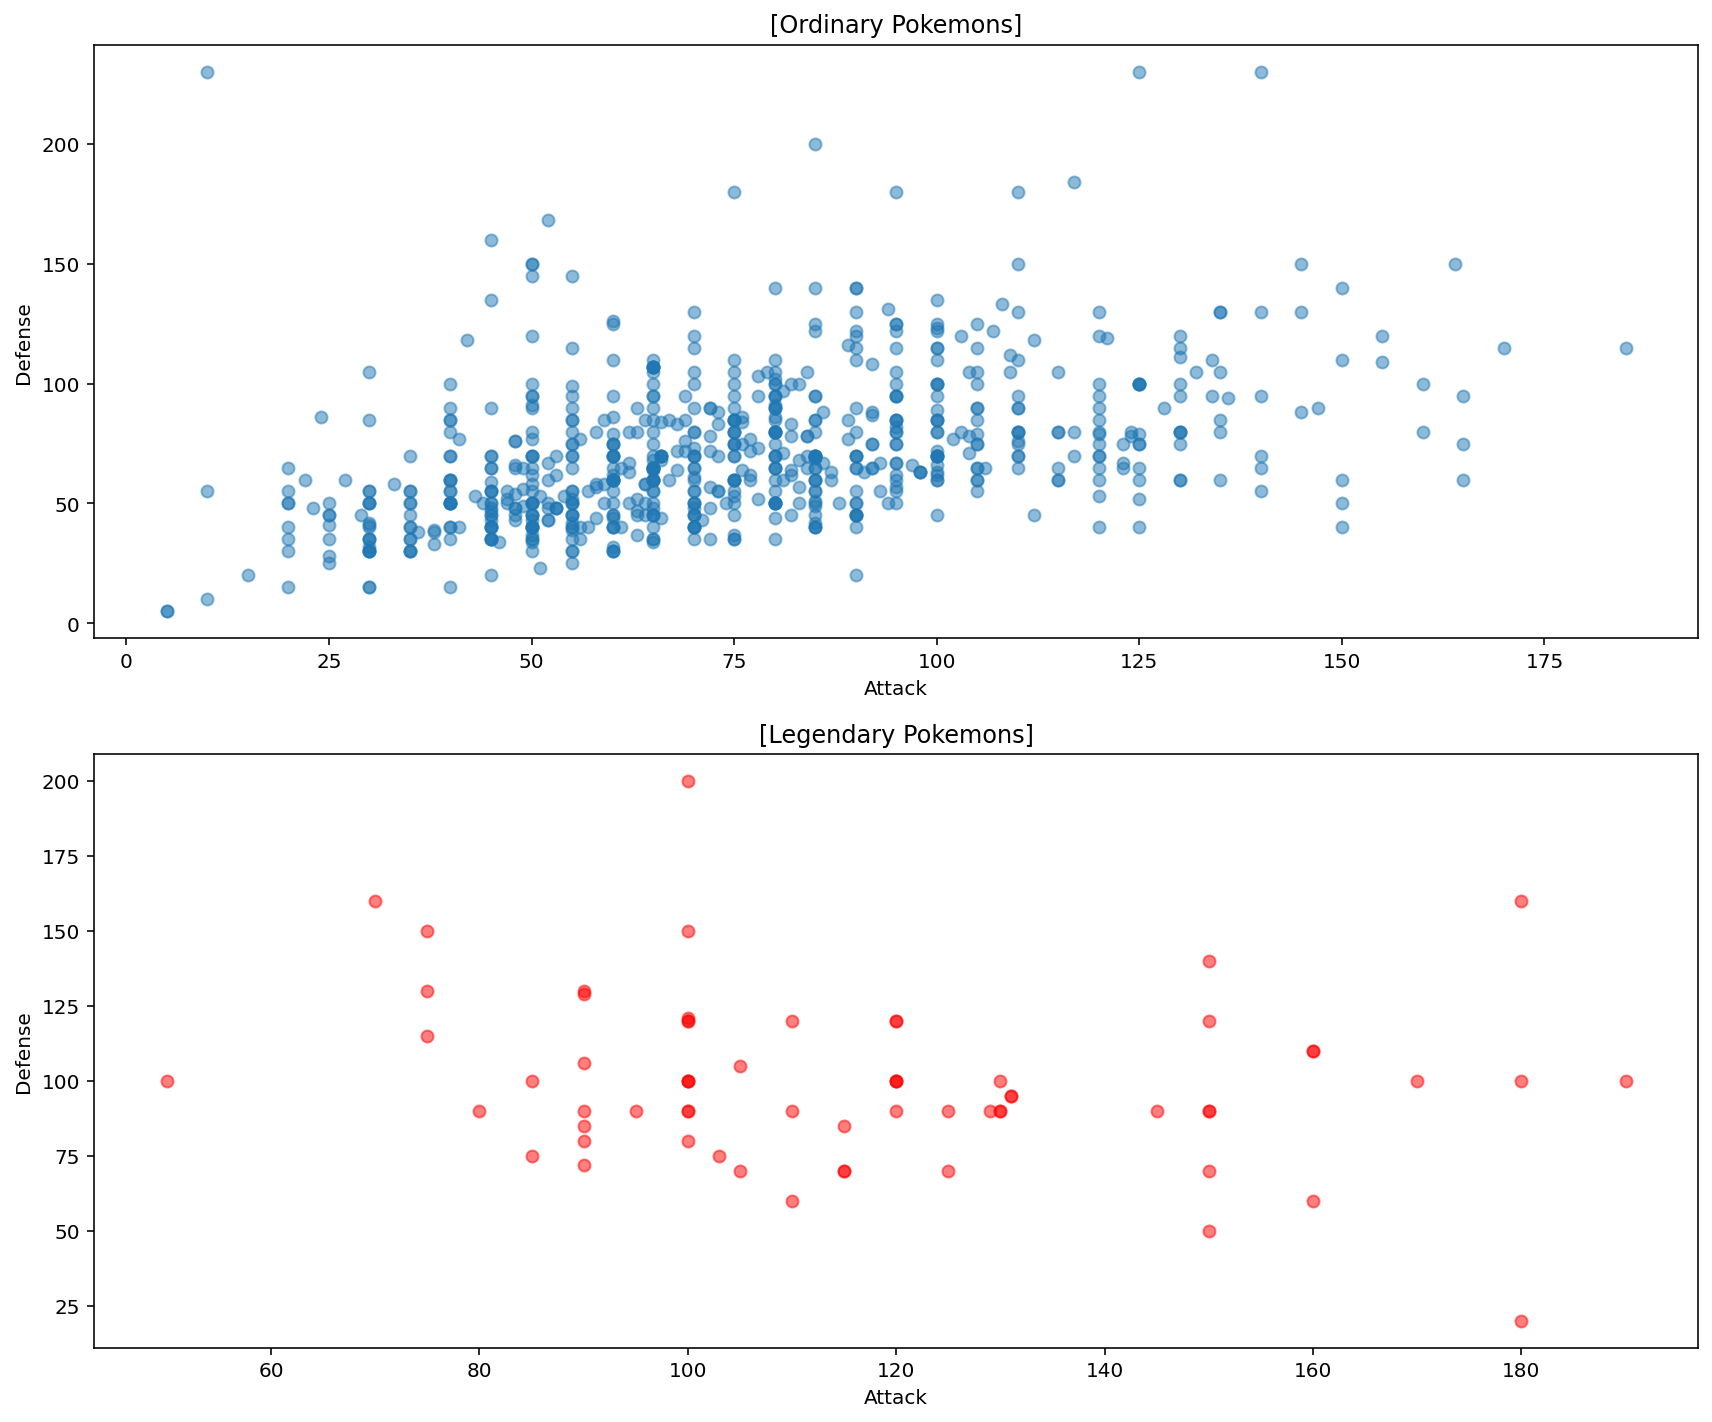

In [ ]:
# Q. 아래 코드의 빈칸을 채워주세요.
plt.figure(figsize=(12, 10))  # Adjust graph size according to screen resolution

plt.subplot(2, 1, 1)
plt.scatter(ordinary['Attack'], ordinary['Defense'], alpha=0.5)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title("[Ordinary Pokemons]")

plt.subplot(2, 1, 2)
plt.scatter(legendary['Attack'], legendary['Defense'], alpha=0.5, color='red')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title("[Legendary Pokemons]")

plt.tight_layout()
plt.show()

In [ ]:
# Q. Type 2에 대해서도 피벗 테이블을 만들어봅시다.
type2_pivot = pd.pivot_table(pokemon,
                             values=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
                             index='Type 2',
                             aggfunc='mean')

# Sort the pivot table by the sum of all stats, in descending order
type2_pivot['Total'] = type2_pivot.sum(axis=1)
type2_pivot_sorted = type2_pivot.sort_values('Total', ascending=False)

# Display the sorted pivot table
print(type2_pivot_sorted)

              Attack     Defense         HP     Sp. Atk    Sp. Def      Speed  \
Type 2                                                                          
Dragon     94.444444   87.055556  82.166667   98.500000  83.444444  80.555556   
Fighting  112.846154   82.500000  79.461538   81.269231  82.384615  87.384615   
Ice        98.000000   85.642857  90.000000   92.642857  84.785714  74.642857   
Fire       81.250000   80.166667  71.250000  110.416667  83.500000  79.666667   
Steel      92.590909  104.636364  64.636364   77.727273  86.272727  59.363636   
Dark      109.800000   72.050000  75.550000   81.800000  69.850000  75.350000   
Psychic    74.696970   87.030303  72.212121   88.030303  87.606061  69.484848   
Electric   72.666667   68.333333  88.166667   81.166667  73.500000  71.500000   
Flying     80.288660   68.309278  71.391753   75.628866  71.206186  85.721649   
Ground     89.857143   90.314286  77.228571   65.542857  66.742857  54.657143   
Rock       84.000000  126.85

In [ ]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [ ]:
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [ ]:
# Q. 'pokemon['Total'].values'와 'pokemon[stats].values의 총합'이 같은 포켓몬의 수를 확인해봅시다.
# Define the list of stat columns
stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Calculate the total stats for each Pokémon
calculated_totals = pokemon[stats].sum(axis=1)

# Check how many Pokémon have the same total as in the 'Total' column
matching_count = (pokemon['Total'].values == calculated_totals.values).sum()

print(f"The number of Pokémon with matching total stats is: {matching_count}")

The number of Pokémon with matching total stats is: 800


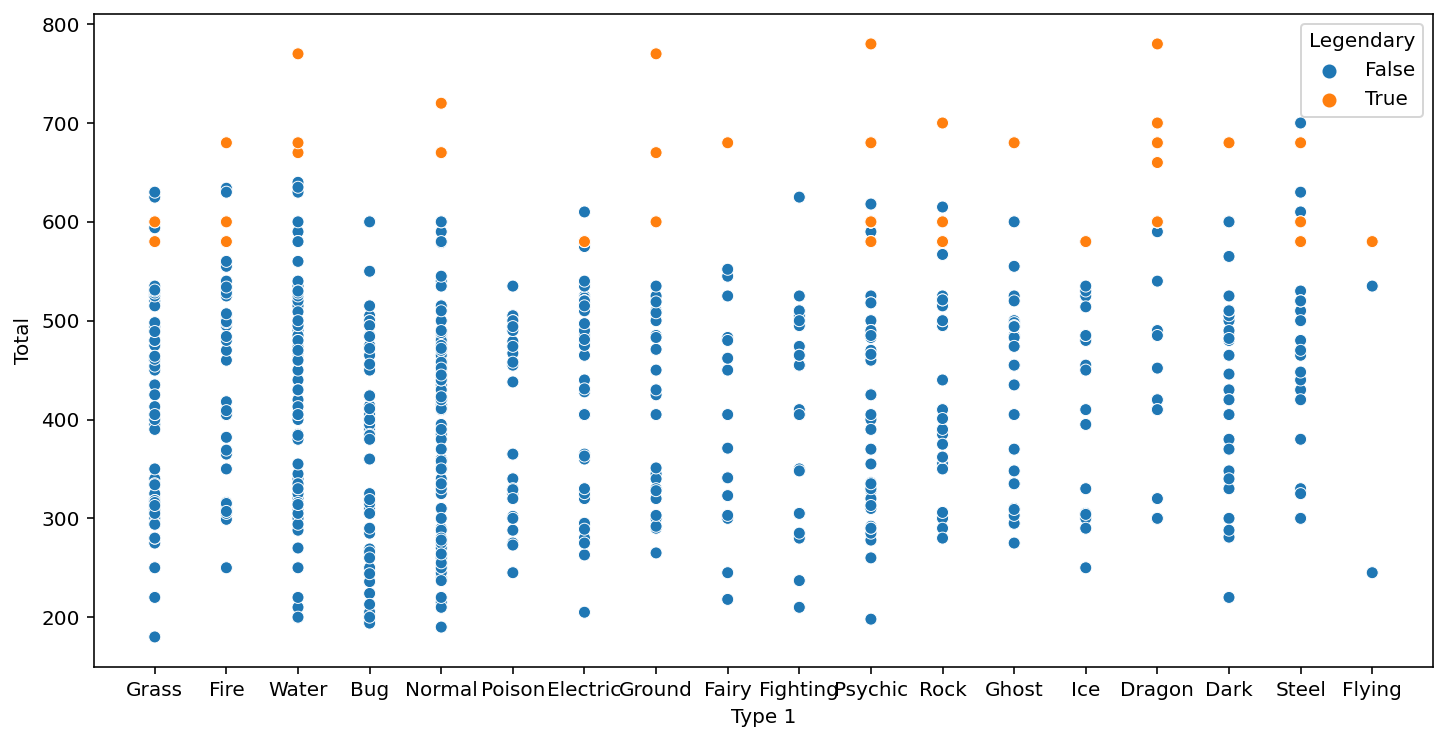

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

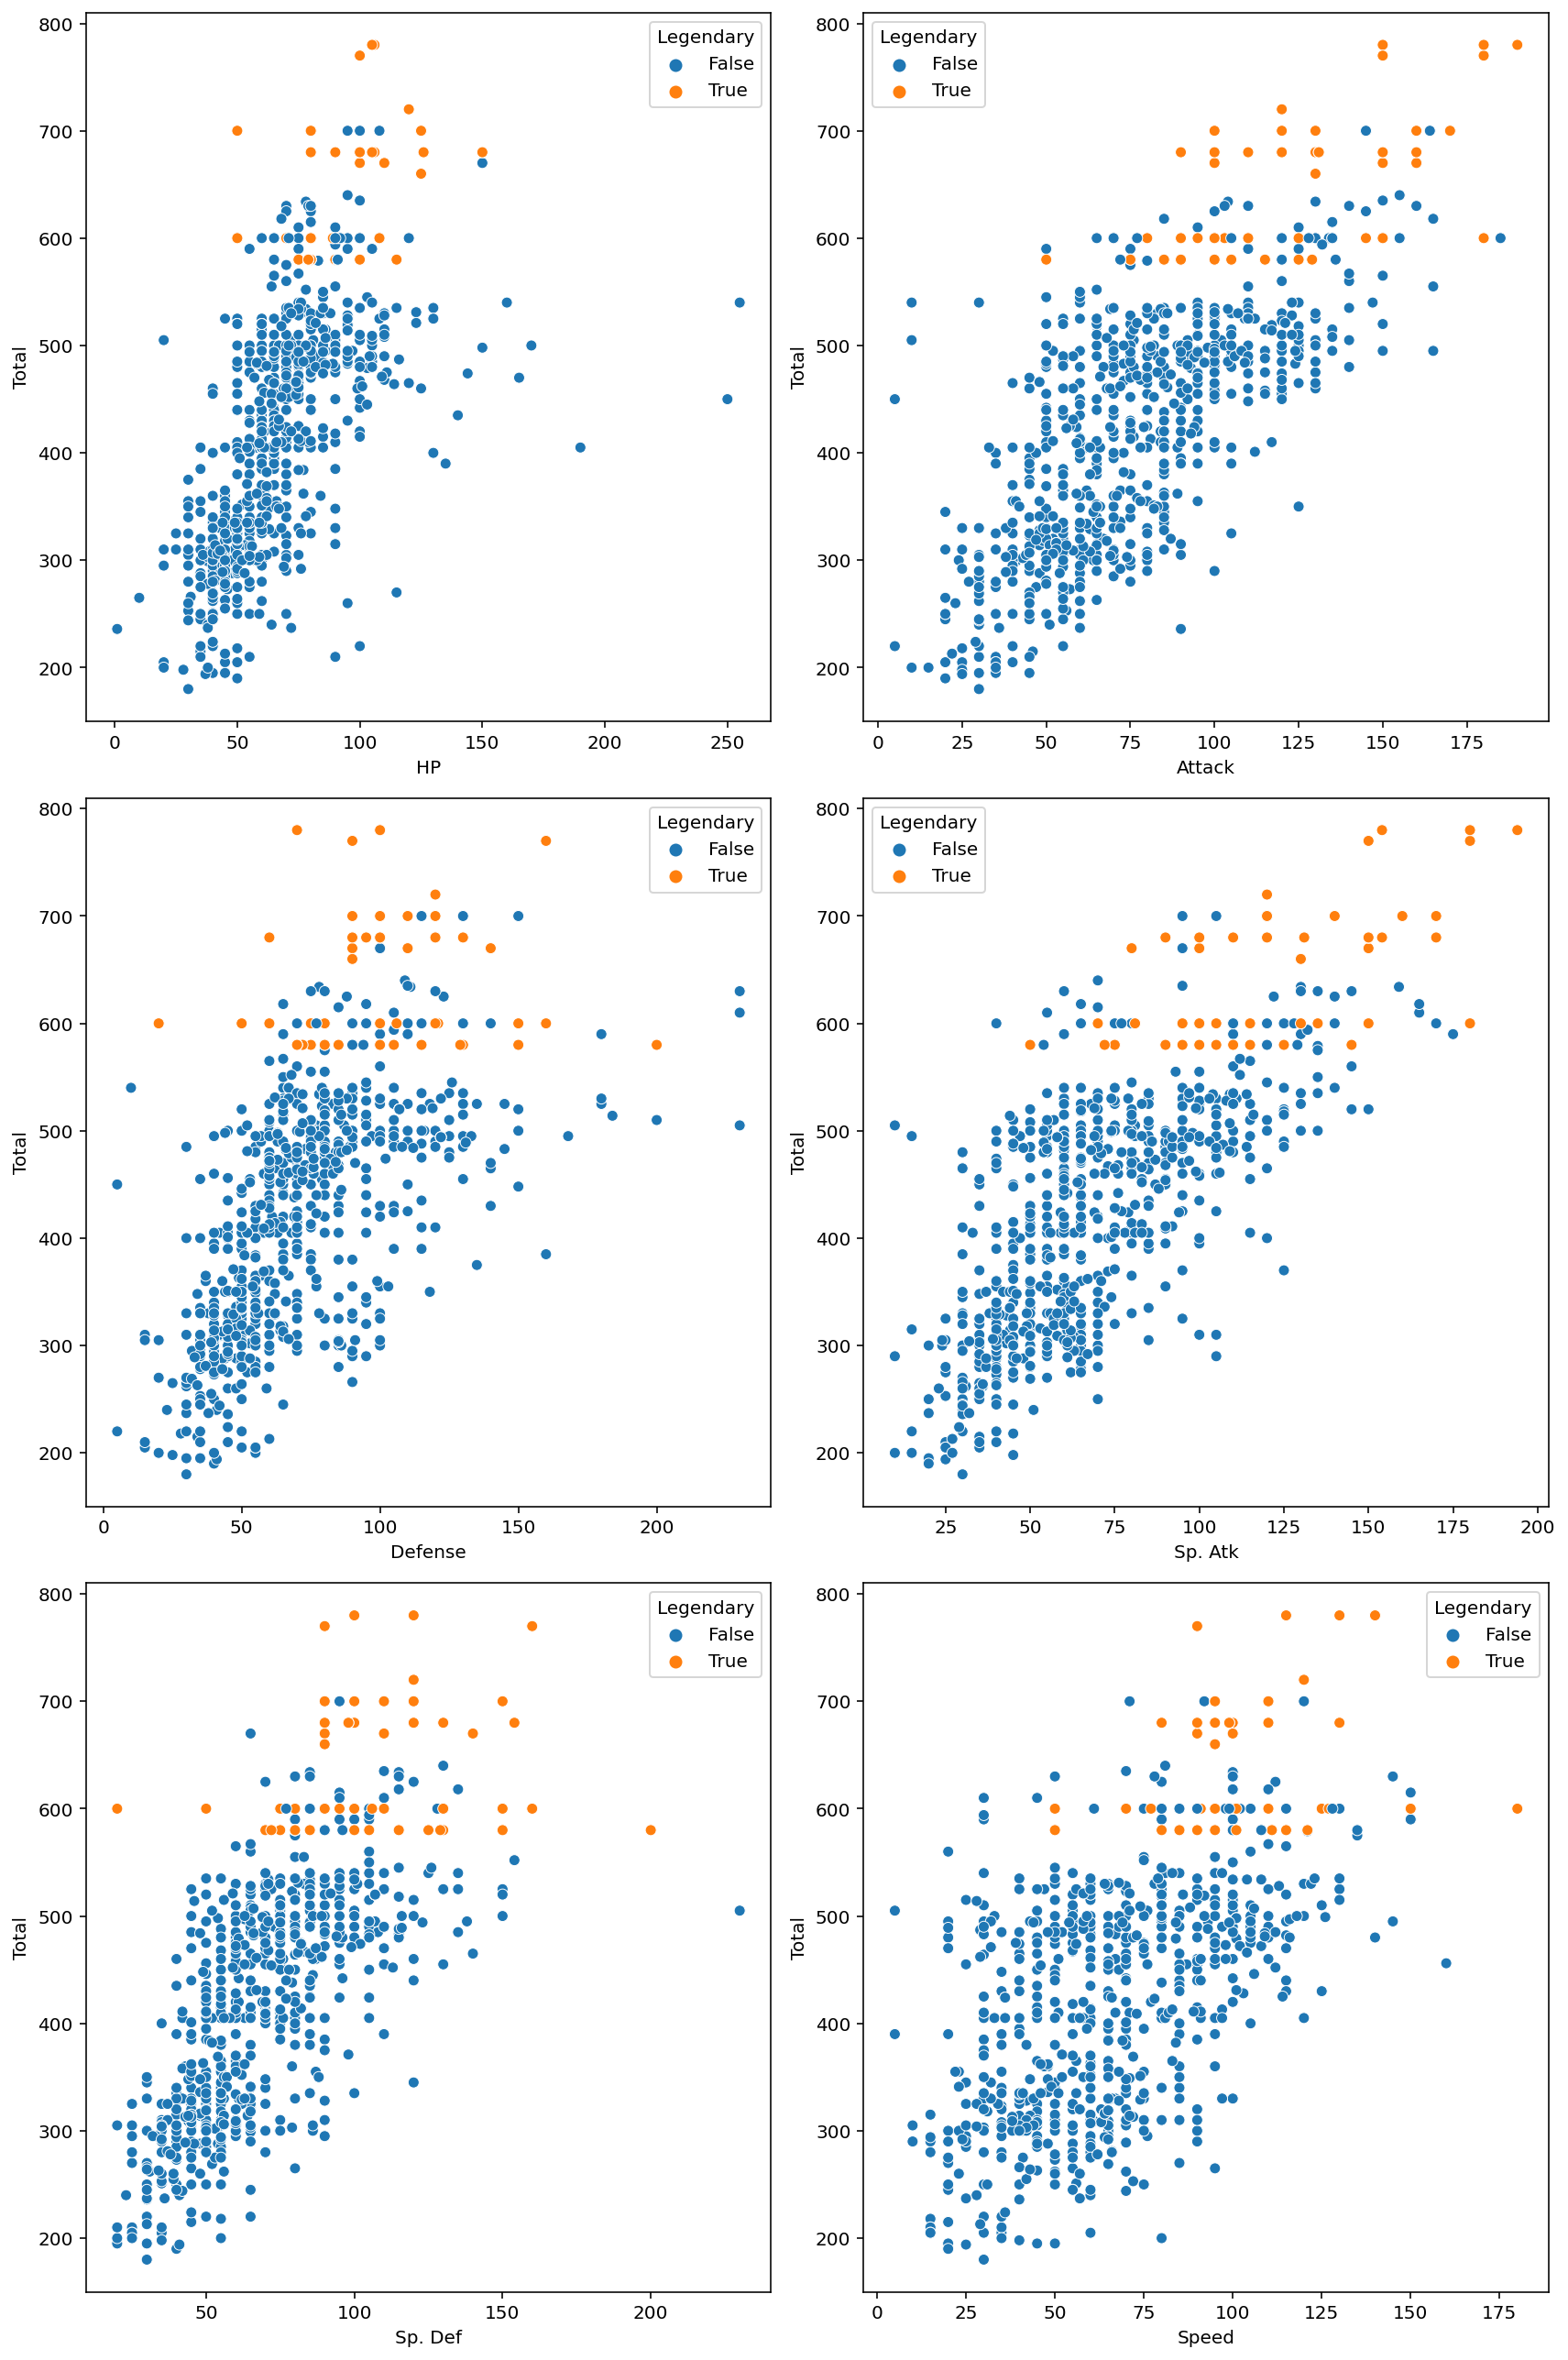

In [ ]:
# Q. 다음 코드의 빈칸을 채워주세요.
# 각각의 스탯에 대한 scatter plot을 6개의 subplot으로 표현합니다.
# 각각의 스탯에 대한 scatter plot을 6개의 subplot으로 표현합니다.

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

plt.tight_layout()
plt.show()

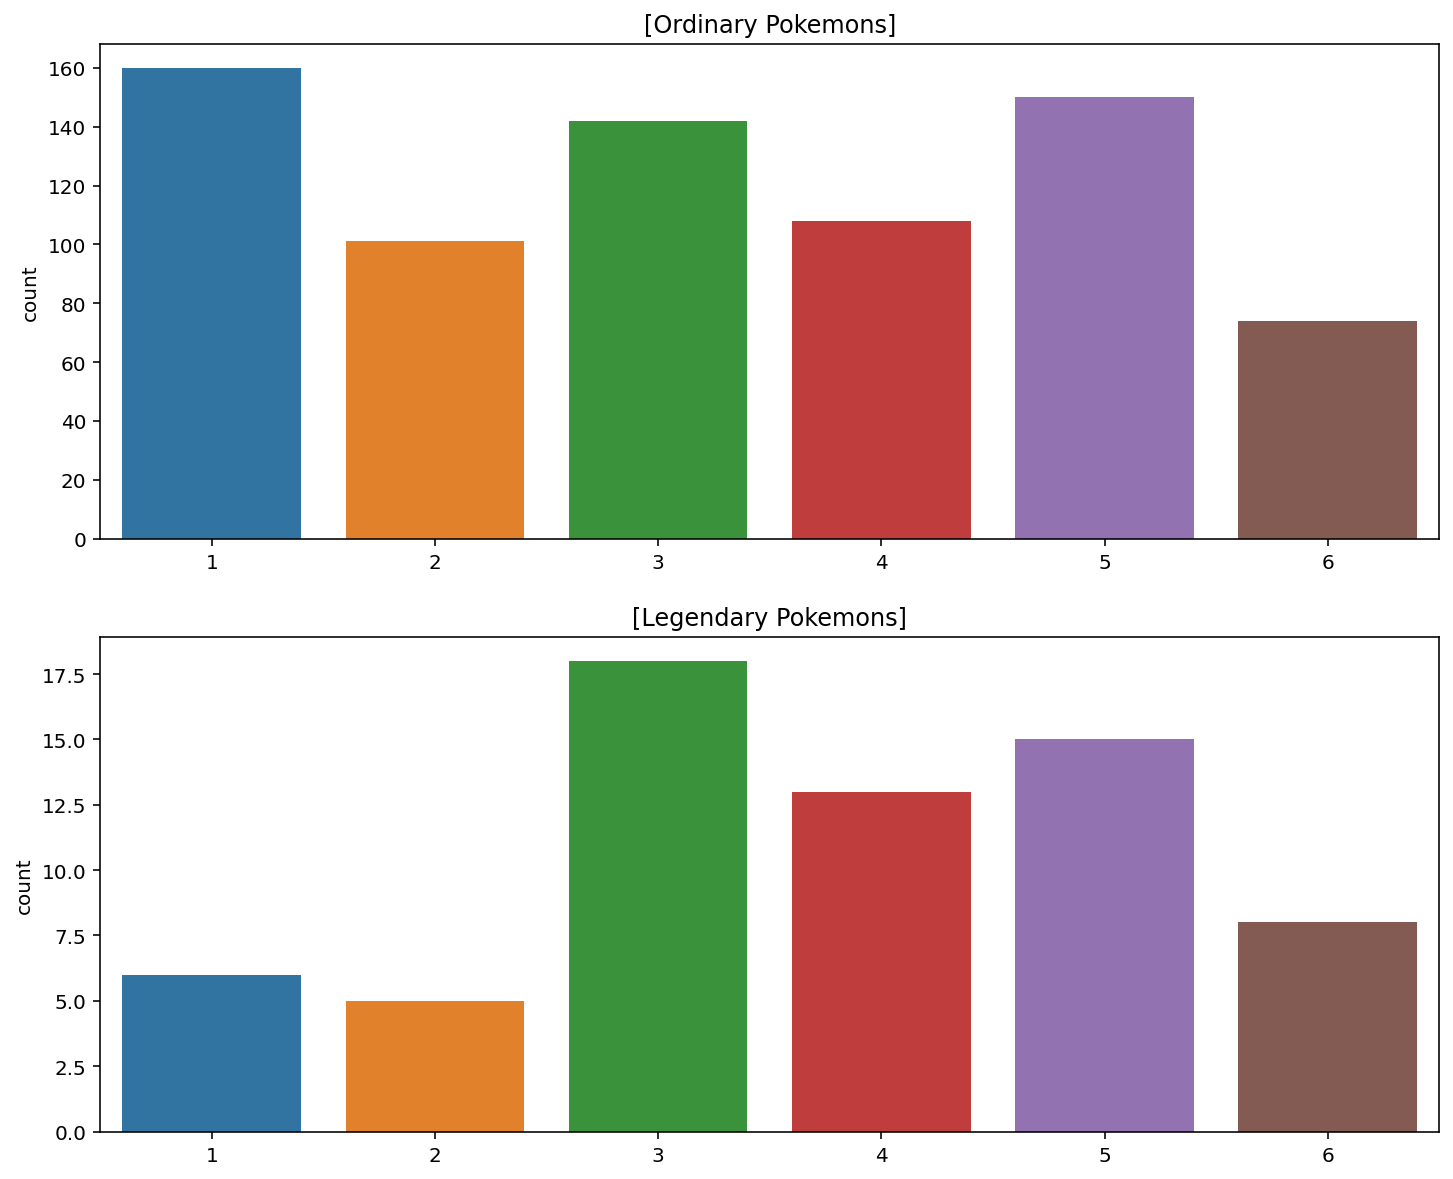

In [ ]:
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

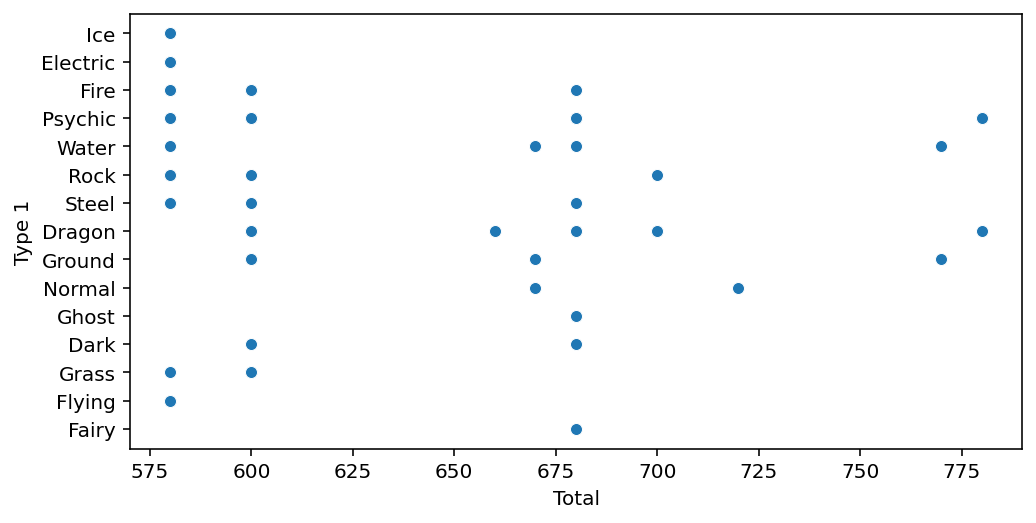

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

In [ ]:
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


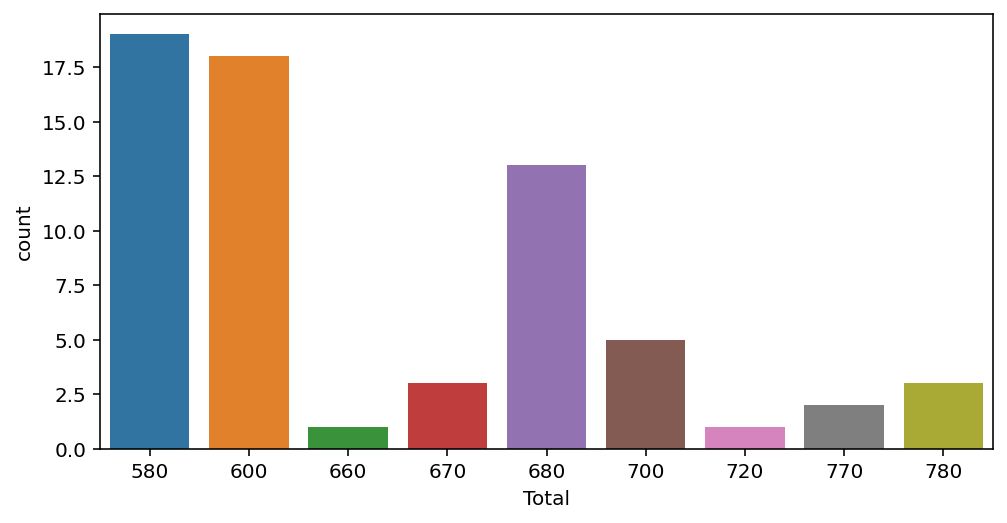

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [ ]:
round(65 / 9, 2)

7.22

In [ ]:
# Q. ordinary 포켓몬의 'Total' 값 집합을 확인해봅시다.
ordinary_totals = set(ordinary['Total'])
print(f"There are {len(ordinary_totals)} unique 'Total' values for ordinary Pokémon.")
print("\nThe set of 'Total' values for ordinary Pokémon is:")
print(sorted(ordinary_totals))

There are 195 unique 'Total' values for ordinary Pokémon.

The set of 'Total' values for ordinary Pokémon is:
[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565,

In [ ]:
# Q. 이 집합의 크기(길이)를 확인해봅시다.
ordinary_totals = set(ordinary['Total'])
set_size = len(ordinary_totals)

print(f"The size of the set of unique 'Total' values for ordinary Pokémon is: {set_size}")

The size of the set of unique 'Total' values for ordinary Pokémon is: 195


In [ ]:
round(735 / 195, 2)

3.77

In [ ]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [ ]:
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


In [ ]:
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [ ]:
# Q. ordinary 포켓몬의 데이터에도 'name_count' 값을 추가해줍시다.
# Count the occurrences of each name in the ordinary Pokémon dataset
name_counts = ordinary['Name'].value_counts()

# Add the 'name_count' column to the ordinary DataFrame
ordinary['name_count'] = ordinary['Name'].map(name_counts)

# Verify the result
print(ordinary[['Name', 'name_count']].head(10))
print("\nShape of ordinary DataFrame:", ordinary.shape)

                        Name  name_count
0                  Bulbasaur           1
1                    Ivysaur           1
2                   Venusaur           1
3      VenusaurMega Venusaur           1
4                 Charmander           1
5                 Charmeleon           1
6                  Charizard           1
7  CharizardMega Charizard X           1
8  CharizardMega Charizard Y           1
9                   Squirtle           1

Shape of ordinary DataFrame: (735, 14)


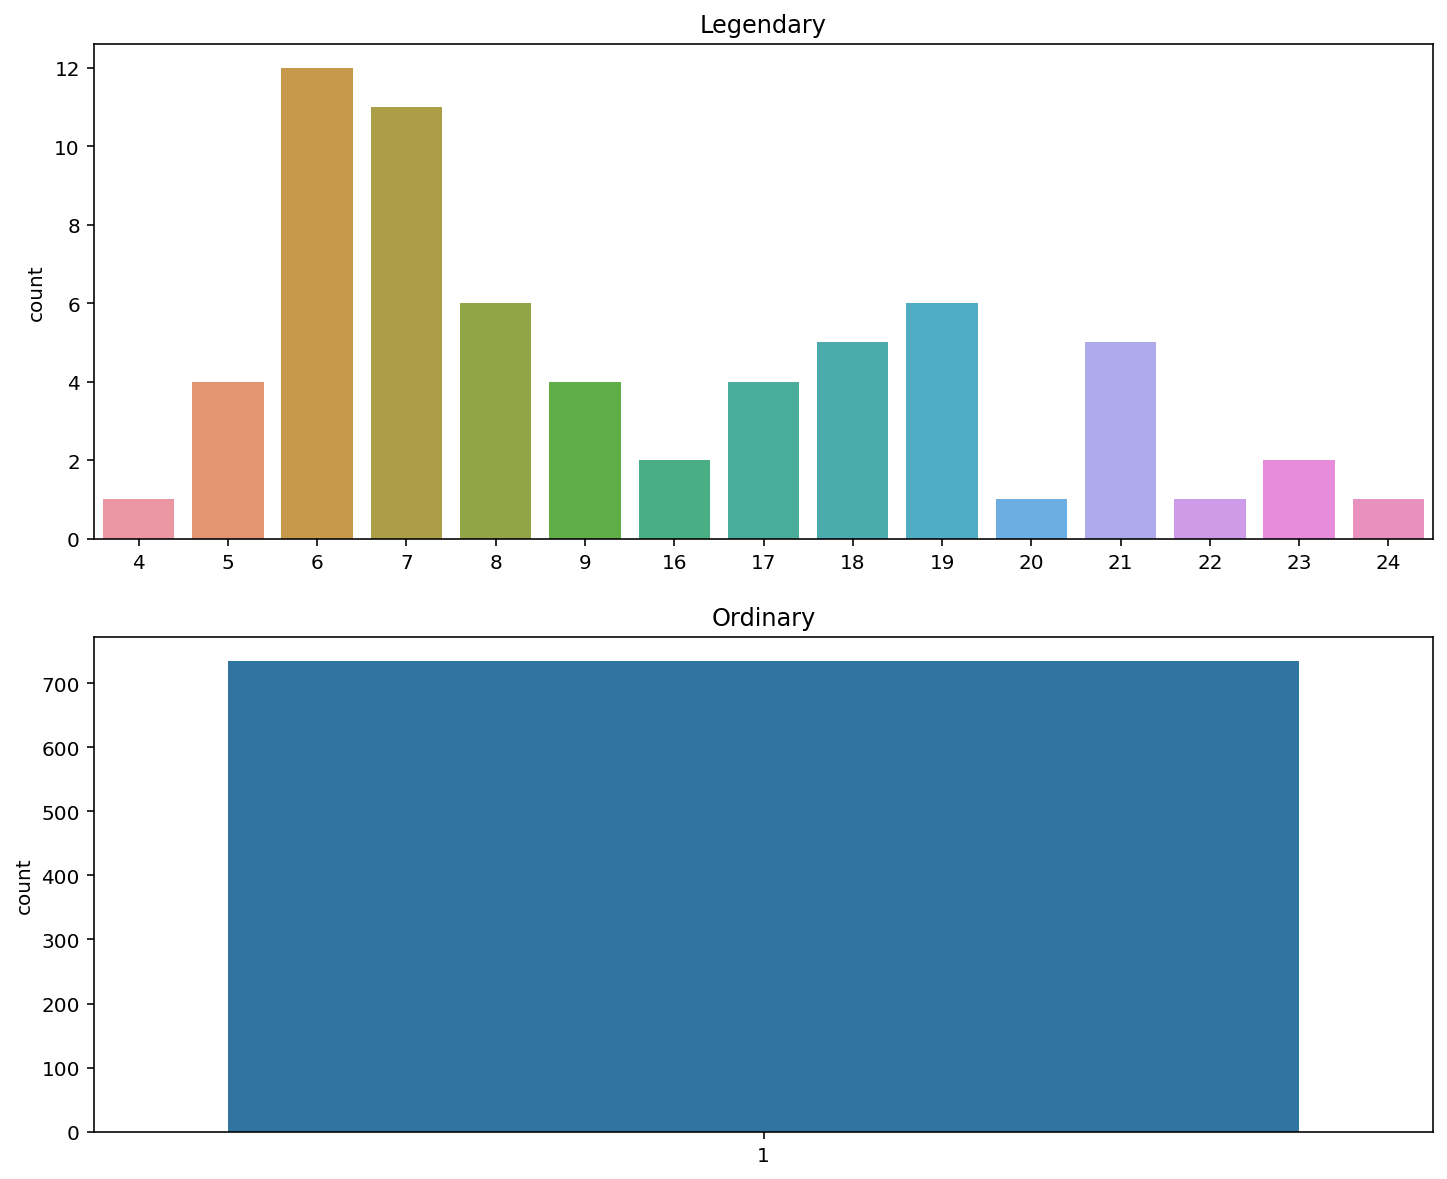

In [ ]:
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

In [ ]:
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [ ]:
# Q. 일반 포켓몬의 이름이 10글자 이상일 확률을 구해보세요.
# Count Pokémon with names of 10 or more characters
long_names = ordinary['Name'].str.len() >= 10

# Calculate the probability
probability = long_names.mean()

print(f"The probability that an ordinary Pokémon's name has 10 or more characters is: {probability:.4f}")
print(f"This means approximately {probability*100:.2f}% of ordinary Pokémon have names with 10 or more characters.")

The probability that an ordinary Pokémon's name has 10 or more characters is: 0.1565
This means approximately 15.65% of ordinary Pokémon have names with 10 or more characters.


In [ ]:
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [ ]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,Volcanion


In [ ]:
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,Charmander,True


In [ ]:
# 전설의 포켓몬을 분류하는 데에 이름의 길잇값 자체를 가진 name_count 컬럼이 더 유리할지, 혹은 long_name이 더 유리할지는 몰라서 모델을 학습시킬 때에는 두 가지를 모두 활용

In [ ]:
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 16)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,Zygarde50%Forme,False


In [ ]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,Zygarde50%Forme,False


In [ ]:
# Q. 바꿔준 'Name' 컬럼으로 'Name_nospace'를 만들고, 다시 isalpha()로 체크해봅시다.
# Create 'Name_nospace' column by removing spaces from 'Name'
pokemon['Name_nospace'] = pokemon['Name'].str.replace(' ', '')

# Check if 'Name_nospace' contains only alphabetic characters
pokemon['name_isalpha'] = pokemon['Name_nospace'].str.isalpha()

# Display Pokémon with non-alphabetic names
non_alpha_pokemon = pokemon[pokemon["name_isalpha"] == False]
print(non_alpha_pokemon[['Name', 'Name_nospace', 'name_isalpha']])

# Count how many Pokémon have non-alphabetic names
non_alpha_count = (~pokemon['name_isalpha']).sum()
print(f"\nNumber of Pokémon with non-alphabetic names: {non_alpha_count}")

Empty DataFrame
Columns: [Name, Name_nospace, name_isalpha]
Index: []

Number of Pokémon with non-alphabetic names: 0


In [ ]:
# name_isalpha 컬럼이 False인 컬럼이 하나도 없음 > 알파벳으로만 이루어졌음을 뜻함

In [ ]:
import re

In [ ]:
name = "CharizardMega Charizard X"

In [ ]:
name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

In [ ]:
temp = name_split[0]
temp

'CharizardMega'

In [ ]:
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

In [ ]:
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

In [ ]:
# Q. 다음 코드의 빈칸을 채워주세요.
def tokenize(name):
    tokens = name.split()
    return np.array(tokens)

In [ ]:
name = "CharizardMega Charizard X"
tokenize(name)

array(['CharizardMega', 'Charizard', 'X'], dtype='<U13')

In [ ]:
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

68
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'MewtwoMega', 'Mewtwo', 'X', 'MewtwoMega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho-oh', 'Regirock', 'Regice', 'Registeel', 'Latias', 'LatiasMega', 'Latias', 'Latios', 'LatiosMega', 'Latios', 'Kyogre', 'KyogrePrimal', 'Kyogre', 'Groudon', 'GroudonPrimal', 'Groudon', 'Rayquaza', 'RayquazaMega', 'Rayquaza', 'Jirachi', 'DeoxysNormal', 'Forme', 'DeoxysAttack', 'Forme', 'DeoxysDefense', 'Forme', 'DeoxysSpeed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'GiratinaAltered', 'Forme', 'GiratinaOrigin', 'Forme', 'Darkrai', 'ShayminLand', 'Forme', 'ShayminSky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'TornadusIncarnate', 'Forme', 'TornadusTherian', 'Forme', 'ThundurusIncarnate', 'Forme', 'ThundurusTherian', 'Forme', 'Reshiram', 'Zekrom', 'LandorusIncarnate', 'Forme', 'LandorusTherian', 'Forme', 'Kyurem', 'KyuremBlack', 'Kyurem', 'KyuremWhite', 'Kyurem', 'Xerneas', 'Yvelt

In [ ]:
from collections import Counter

In [ ]:
a = [1, 1, 0, 0, 0, 1, 1, 2, 3]
Counter(a)

Counter({1: 4, 0: 3, 2: 1, 3: 1})

In [ ]:
Counter(a).most_common()

[(1, 4), (0, 3), (2, 1), (3, 1)]

In [ ]:
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mewtwo', 3),
 ('Kyurem', 3),
 ('MewtwoMega', 2),
 ('Latias', 2),
 ('Latios', 2),
 ('Kyogre', 2),
 ('Groudon', 2),
 ('Rayquaza', 2),
 ('Diancie', 2)]

In [ ]:
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mewtwo,Kyurem,MewtwoMega,Latias,Latios,Kyogre,Groudon,Rayquaza,Diancie
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,False,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,False,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,False,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# 이제 전설의 포켓몬이 많이 가지는 Forme와 같은 토큰의 컬럼 값이 True라면 그 포켓몬은 전설의 포켓몬일 확률이 높다고 판단할 수 있음
# 머신러닝 모델 학습에서 문자열 데이터는 소중한 정보를 가지고 있지만, 문자열 그대로 학습에 사용할 수는 없음
# 이렇게 적절한 방법을 통해서 문자열 데이터를 숫자나 부울 데이터로 변환해서 정보를 넣어주면 모델의 성능을 올리는 데에 도움을 줄 수 있음

In [ ]:
print(types)

['Dragon', 'Poison', 'Fighting', 'Steel', 'Grass', 'Ghost', 'Ice', 'Fire', 'Bug', 'Normal', 'Psychic', 'Fairy', 'Water', 'Flying', 'Rock', 'Electric', 'Dark', 'Ground']


In [ ]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Dragon,Poison,Fighting,Steel,Grass,Ghost,Ice,Fire,Bug,Normal,Psychic,Fairy,Water,Flying,Rock,Electric,Dark,Ground
0,Grass,Poison,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Grass,Poison,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Grass,Poison,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Grass,Poison,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Fire,NaN,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [ ]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [ ]:
target = 'Legendary'

In [ ]:
# Q. 'original_data'에서 'features' 컬럼에 해당하는 데이터를 변수 'X'에 저장합니다.
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [ ]:
# Q. 'target' 컬럼의 데이터를 변수 'y'에 저장합니다.
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


In [ ]:
# 모델 개발 완료

In [ ]:
from sklearn.tree import DecisionTreeClassifier
print('슝=3')

슝=3


In [ ]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [ ]:
#모델 준비 완료

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('슝=3')

슝=3


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

In [ ]:
len(legendary)

65

In [ ]:
# 전체 800마리 중, 단 65마리만 전설의 포켓몬이고, 735마리는 일반 포켓몬.
# 바로, 800마리를 전부 다 일반 포켓몬으로 예측하더라도, 735마리는 일단 맞히고 들어간다는 것을 뜻함
# 즉, 아무런 학습을 안 하고 모든 답을 하나로 찍어도, 735 / 800 * 100 = 92%의 정확도를 달성할 수 있다는 것
# 따라서 이번 데이터셋에서는 정확도로 모델의 성능을 평가하는 것은 거의 의미가 없음

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



In [ ]:
print(len(pokemon.columns))
print(pokemon.columns)

44
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'Name_nospace', 'name_isalpha', 'Forme', 'Mewtwo', 'Kyurem',
       'MewtwoMega', 'Latias', 'Latios', 'Kyogre', 'Groudon', 'Rayquaza',
       'Diancie', 'Dragon', 'Poison', 'Fighting', 'Steel', 'Grass', 'Ghost',
       'Ice', 'Fire', 'Bug', 'Normal', 'Psychic', 'Fairy', 'Water', 'Flying',
       'Rock', 'Electric', 'Dark', 'Ground'],
      dtype='object')


In [ ]:
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

In [ ]:
# 총 7개를 제외하니 38개의 컬럼만 남음

In [ ]:
target = "Legendary"
target

'Legendary'

In [ ]:
# Q. 사용할 feature에 해당하는 데이터를 'X' 변수에 저장합니다.
features_to_use = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
                   'Water', 'Dragon', 'Fire', 'Fairy', 'Poison', 'Psychic', 'Normal', 'Ground',
                   'Rock', 'Ice', 'Ghost', 'Steel', 'Flying', 'Bug', 'Electric', 'Dark', 'Grass', 'Fighting']

X = pokemon[features_to_use]
print(X.shape)
X.head()

(800, 26)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Water,Dragon,...,Rock,Ice,Ghost,Steel,Flying,Bug,Electric,Dark,Grass,Fighting
0,318,45,49,49,65,65,45,1,False,False,...,False,False,False,False,False,False,False,False,True,False
1,405,60,62,63,80,80,60,1,False,False,...,False,False,False,False,False,False,False,False,True,False
2,525,80,82,83,100,100,80,1,False,False,...,False,False,False,False,False,False,False,False,True,False
3,625,80,100,123,122,120,80,1,False,False,...,False,False,False,False,False,False,False,False,True,False
4,309,39,52,43,60,50,65,1,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Q. 정답 데이터 'y'도 'target' 변수를 이용해 만들어줍시다.
y = pokemon['Legendary']
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 26) (640,)
(160, 26) (160,)


In [ ]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model with the training data
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
predictions = model.predict(X_test)

# Display the first few predictions
print(predictions[:5])

[False False  True False False]


In [ ]:
# Q. confusion matrix를 확인해보세요.
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[144   3]
 [  7   6]]


In [ ]:
# Q. classification report도 확인해봅시다!
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, predictions)

# Display the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.98      0.97       147
        True       0.67      0.46      0.55        13

    accuracy                           0.94       160
   macro avg       0.81      0.72      0.76       160
weighted avg       0.93      0.94      0.93       160



In [ ]:
# 위에서 약 0.62에 그쳤던 recall값이 무려 0.92로까지 올라감

In [ ]:
# 회고: 처음에는 손조차 못 써보던 파이썬을 이만큰 다룰 수 있고, 결과까지 도출할 수 있게 되어 정말 보람차다.
# 하지만 앞으로 배울 부분이 더 많이 남아 있고 특히 모델 개발에 있어서는 여러가지 시도해야 할 부분이 많아서 마음을 다잡고 다시 정진해야겠다.

In [ ]:
# Reference
# - https://www.kaggle.com/datasets/abcsds/pokemon?resource=download
# - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html
# - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isalpha.html
# - https://wikidocs.net/4308